# K Nearest Neighbor

![](img/wilson.jpg)

## A movie-ing target

## Friend inventory

On a piece of paper, draw a two column table.
- 1st column: names of 9 friends
- 2nd column: whether each friend would recommend Parasite or A Star is Born




![movies](img/movies.png)

In [ ]:
Draw a target with three rings

![bullseye3](img/bullseye2.png)

## Friend Inventory
### Decision majority by ring

If you just polled the inner ring of people, what movie would you end up seeing?
- How about if you polled the first *and* second ring?
- The first three rings?


## Friend Inventory
### What did you end up seeing?

Who's movie choices changed based on how many people you polled?
![movies](img/movies.png)



## Friend Inventory
### What's the "algorithm" we used for this process, in normal words?

### How does this relate to K nearest neighbor(knn)?

![annotate](img/bullseye-annotate.png)

# What do we have so far in our machine learning toolkit?

![](https://media.giphy.com/media/EX0Bia9M5eUoM/giphy.gif)

- So far, we have two models, linear regression and logistic regression.
They are very different with regards to their target variable. <br>
- But, they are similar in their underlying assumption.  Both assume a linear relationship between target and features. 
- During training, the machine learns the "best-fit" $\beta$-parameters to create a predictive model that outputs the result of a linear equation.

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2, x_2 +\ldots + \beta_n x_n $$

Such models are called **parametric**. After training, need the $\beta$-parameters are all you need to be able to predict on new data.

>Other parametric models are:<br>
    1. Naive-Bayes<br>
    2. Linear Discriminant Analysis<br>
    3. Simple neural networks<br>
    

    

## K-nearest neighbors (KNN) classification

> K-Nearest Neighbors, or KNN, is our first example of a **non-parametric model**.

> Non-parametric models assume that the data distribution cannot be defined in
terms of such a finite set of parameters.

> KNN is also a **Lazy learning** or **Instance-based (IB)** algorithm.  IB learning methods simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made.

> This means:
 - the training time for KNN is very small; the time it takes to store the training data in memory.  
 - predictions are memory intensive, and can take a long time.

# Implementing a K-Nearest Neighbors Model

### How does the KNN algorithm work?

### What should the grey point be?

<img src='img/scenario.png' width=500/>

## KNN has the following basic steps:

<img src='img/knn-process.png' width=500/>

### Voting

How to break ties:

1. When doing a binary classification, often use an odd K to avoid ties.
2. Multiple approaches for Multiclass problems:
    - Reduce the K by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors

### Example training data

This example uses a multi-class problem and each color represents a different class. 

### KNN classification map (K=1)

![1NN classification map](img/knn_1neighbor.png)

K=1 corresponds to [voronoi cells](https://en.wikipedia.org/wiki/Voronoi_diagram)

![](img/vernoi_cells.png)

### KNN classification map (K=3)

![5NN classification map](img/knn_3neighbors.png)


# Euclidean Distance

**Euclidean distance** refers to the distance between two points. These points can be in different dimensional space and are represented by different forms of coordinates. In one-dimensional space, the points are just on a straight number line.



### Measuring distance in a 2-d Space

In two-dimensional space, the coordinates are given as points on the x- and y-axes

![alt text](img/euclidean_2d.png)

## A bit more math
### Measuring distance in a 3-d Space

In three-dimensional space, x-, y- and z-axes are used. 

$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 +  (z_1-z_2)^2}$$


## A bit more math
### Euclidean Distance Equation
![alt text](img/euclidean-equation.png)

The source of this formula is in the Pythagorean theorem. 

# Let's code out KNN together using Euclidean distance

In [4]:
# Create toy dataset with 3-D data randomnly created.
import numpy as np
np.random.seed(42)

# sets of 25 between 0 and 100
x_points = np.random.uniform(0,100,25)
y_points = np.random.uniform(0,100,25)
z_points = np.random.uniform(0,100,25)
points = [[x,y,z] for x,y,z in zip(x_points,y_points,z_points)]
labels = np.random.choice(['r', 'b'], size=25)
points

[[37.454011884736246, 78.51759613930136, 96.95846277645586],
 [95.07143064099162, 19.967378215835975, 77.51328233611146],
 [73.1993941811405, 51.42344384136116, 93.9498941564189],
 [59.86584841970366, 59.24145688620425, 89.48273504276489],
 [15.601864044243651, 4.645041271999773, 59.78999788110851],
 [15.599452033620265, 60.75448519014384, 92.18742350231169],
 [5.8083612168199465, 17.052412368729154, 8.84925020519195],
 [86.61761457749351, 6.505159298527952, 19.59828624191452],
 [60.11150117432088, 94.88855372533332, 4.522728891053807],
 [70.80725777960456, 96.56320330745594, 32.53303307632643],
 [2.0584494295802447, 80.83973481164611, 38.8677289689482],
 [96.99098521619943, 30.46137691733707, 27.134903177389592],
 [83.24426408004217, 9.767211400638388, 82.87375091519293],
 [21.233911067827616, 68.42330265121569, 35.67533266935893],
 [18.182496720710063, 44.01524937396013, 28.093450968738075],
 [18.34045098534338, 12.203823484477883, 54.26960831582485],
 [30.42422429595377, 49.51769101

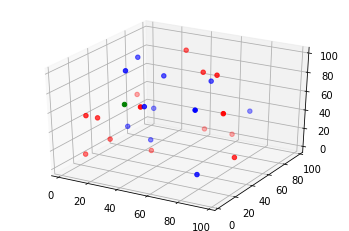

In [2]:
from mpl_toolkits import mplot3d
np.random.seed(40)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

new_point = [np.random.uniform(0,100),
              np.random.uniform(0,100),
              np.random.uniform(0,100)]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xs = x_points, ys = y_points, zs=z_points, c=labels)
ax.scatter(new_point[0],new_point[1],new_point[2], color='green')


In [3]:
# Define how many Neighbors you want to use to determine the green point
k = 5

In [5]:
# define a function which calculates the euclidean distance between 2 points
import numpy as np
def euclid(new_point, point_2):
    
    # determine how to subtract x, y, z positions
    x_distance = point_2[0] - new_point[0]
    y_distance = point_2[1] - new_point[1]
    z_distance = point_2[2] - new_point[2]
    # square the differences
    x2 = x_distance ** 2 
    y2 = y_distance ** 2
    z2 = z_distance ** 2 
    # sum the squared differences
    total = x2 + y2 + z2
    # take the square root of the sum
    distance = np.sqrt(total)
    return distance

In [10]:
# Use the euclid function to find the distance from the new point 

euc_dist = [euclid(new_point, point) for point in points]

euc_dist

# to all of the points we plotted earlier.


[75.26621093610034,
 56.20346648378827,
 58.18292961828191,
 57.98183414553032,
 31.584510498202672,
 62.1313079624167,
 79.09129282257368,
 74.92823043016321,
 117.82604329565014,
 106.46004454854037,
 93.63709804434029,
 80.35546859837571,
 42.87462956323151,
 78.74451111174942,
 67.5819812396288,
 33.93884829064993,
 78.96416796150778,
 11.971614183956232,
 111.3373247636826,
 30.70557125285427,
 64.07712334747568,
 69.6797701230188,
 91.78273016036708,
 49.381370117746364,
 16.055958293495017]

In [20]:
# sort the points in ascending order
euc_dist_ind = sorted(enumerate(euc_dist), key=lambda x: x[1])
# and keep track of the indices to allow access to the labels
euc_dist_ind = [point[0] for point in euc_dist_ind]
# Choose the top K points, and determine the majority.
labels[euc_dist_ind]

array(['r', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'b', 'b', 'b',
       'r', 'b', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'b', 'r', 'r'],
      dtype='<U1')

In [21]:
from scipy.spatial import distance

sp_euc = [distance.euclidean(new_point, train_point) 
          for train_point in points]
euc_closest = sorted(enumerate(sp_euc), key=lambda x: x[1])
euc_closest_ind = [x[0] for x in euc_closest]
labels[euc_closest_ind]

array(['r', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'b', 'b', 'b',
       'r', 'b', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'b', 'r', 'r'],
      dtype='<U1')

# Manhattan distance

Manhattan distance is the distance measured if you walked along a city block instead of a straight line. 

> if 𝑥=(𝑎,𝑏) and 𝑦=(𝑐,𝑑),  
> Manhattan distance = |𝑎−𝑐|+|𝑏−𝑑|

![](img/manhattan.png)

In [22]:
# We can easily change the distance metric with scipy
sp_man = [distance.cityblock(new_point, train_point) 
          for train_point in points]
man_closest = sorted(enumerate(sp_man), key=lambda x: x[1])
man_closest_ind = [x[0] for x in man_closest]
labels[man_closest_ind]

array(['r', 'b', 'r', 'b', 'b', 'r', 'b', 'r', 'b', 'r', 'r', 'b', 'r',
       'b', 'r', 'b', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'b', 'r'],
      dtype='<U1')

## Implementing the KNN Classifier with SKlearn

## Reviewing the Pima dataset

We are going to revisit the pima native Americans diabetes dataset. Can we use knn to classify people correctly and then predict if someone will have diabetes?
import pandas as pd

In [19]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Loading the data


In [23]:
import pandas as pd
import numpy as np

diabetes = pd.read_csv('diabetes.csv')
y = diabetes.Outcome
X = diabetes.drop('Outcome', axis = 1)


In [24]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [25]:
np.unique(y, return_counts=True)

(array([0, 1]), array([500, 268]))

In [26]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1,
                                                   stratify=y)

### Importance of Scaling

Scaling is essential for algorithms which depend on distance calculations.

Consider, in the diabetes dataset, how the euclidean distance would change with and without scaling. 

How would the influence of BMI in the distance metric compare to the influence of pregnancies?


#### Should we use a Standard Scaler or Min-Max Scaler?

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
http://datareality.blogspot.com/2016/11/scaling-normalizing-standardizing-which.html

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

# Save index and column since scaler strips X_train
X_train_index = X_train.index
X_train_col = X_train.columns

# Scaler is fit on X_train
X_train = scaler.transform(X_train) 
X_train = pd.DataFrame(X_train)
X_train.index = X_train_index
X_train.columns = X_train_col
X_train = X_train[(X_train < 3).all(axis=1)]
y_train = y_train[X_train.index]
X_test = scaler.transform(X_test)  

In [20]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
610,-0.253512,-0.481099,-0.840645,0.019973,0.739866,-0.162996,-0.553372,-0.785627
681,-1.133169,1.267051,0.374857,0.962967,-0.734164,2.312562,-0.340176,-0.614703
706,1.799021,-0.200146,-3.824150,-1.300218,-0.734164,-4.253625,-0.645164,-0.272855
281,1.799021,0.236891,0.374857,0.460037,0.404011,0.498918,-0.588904,0.496303
625,0.039707,-0.980570,1.037858,1.654496,-0.230382,0.737207,-0.346098,-0.358317


## scikit-learn 4-step modeling pattern

![steps](img/sklearnsteps.png)

**Step 1:** Import the class you plan to use

In [28]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

**Class specifications**
- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [31]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [35]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)
y_pred_class

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [37]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.7239583333333334
F1: 0.5619834710743802


In [38]:
pd.crosstab(y_test, y_pred_class, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,105,20,125
1,33,34,67
All,138,54,192


In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_class)

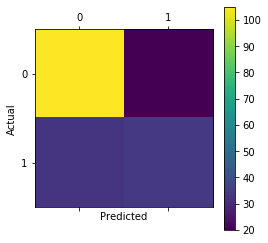

In [40]:
plt.matshow(cm)

plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

## Using a different value for K

In [41]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [42]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.7604166666666666
F1: 0.6166666666666666


In [43]:
from sklearn.metrics import classification_report  

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       125
           1       0.70      0.55      0.62        67

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



#### Search for an optimal value of K for KNN


In [44]:
k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.6673008134440392, 0.6688762626262627, 0.7159519713205333, 0.71597413003663, 0.7527935606060607, 0.7336761778367618, 0.7513792425980205, 0.7271250347511815, 0.7574867211035358, 0.7447730037602301, 0.7452173164954065, 0.7159872810675564, 0.7235336838567176, 0.7025839406412722, 0.734375500176062, 0.7245382528011204, 0.7373294346978557, 0.7373294346978557, 0.7327221728355152]


#### Visual comparison of different $K$s


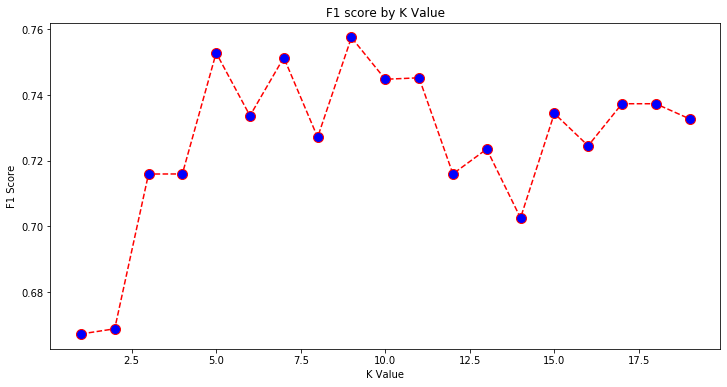

In [45]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### What value of K performs best on our Test data?

Here we use F score, what other metrics could we use?

# Grid Search

In [47]:
# Grid Search
# Create regularization hyperparameter space
k = np.arange(2,20,1)
print(k)
# Create hyperparameter options
hyperparameters = dict(n_neighbors=k, p = [1,2])


[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [49]:
from sklearn.model_selection import GridSearchCV
# Create grid search using 5-fold cross validation
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, cv=5, verbose=0, scoring='f1')

grid = clf.fit(X_train, y_train)
print(grid.best_estimator_.get_params()['n_neighbors'])
print(grid.best_estimator_.get_params()['p'])
grid.best_score_

3
2


0.6213772368510582

In [53]:
from sklearn.metrics import f1_score
knn_best = KNeighborsClassifier(n_neighbors=3, p=2)
knn_best.fit(X_train, y_train)
y_hat = knn_best.predict(X_test)
knn_best.score(X_test, y_test)
f1_score(y_test, y_hat)

0.5619834710743802

### How do you think K size relates to our concepts of bias and variance?

![alt text](img/K-NN_Neighborhood_Size_print.png)

# KNN as regression  

KNN can also be used to predict a continuous target variable.
It simply finds the K nearest neighbors for a new point, then predicts the new point as the average of the target values for those k-nearest neighbors.

In [54]:

diabetes = pd.read_csv('diabetes.csv')
y = diabetes.BMI
X = diabetes.drop('BMI', axis = 1)


# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1,
                                                  )

In [55]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=10)
knr.fit(X_train, y_train)
y_hat = knr.predict(X_test)
knr.score(X_test, y_test)

0.28676323065557846

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)